In [400]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [401]:
#Function for loading data
def load_data(molecule, molecule_data, process):
    for i in range(1,4): #Each set of data has three runs 
        temp_string_1 = str(molecule) + "_" + str(process) + "_" + str(i)
        temp_string_2 = str(molecule) + "-" + str(process)
        temp_string_3 = str(process) + "-Data"
        path = "Ideal-Gas-Law-Data/" + temp_string_3 + "/" + temp_string_2 + "/" + temp_string_1
        molecule_data.append(np.loadtxt(path))
    return molecule_data

In [402]:
#Loading isothermal data
argon_isothermal_data = []
argon_isothermal_data = load_data("argon", argon_isothermal_data, "isothermal")

nitrogen_isothermal_data = []
nitrogen_isothermal_data = load_data("nitrogen", nitrogen_isothermal_data, "isothermal")

CO2_isothermal_data = []
CO2_isothermal_data = load_data("CO2", CO2_isothermal_data, "isothermal")

In [403]:
#Index assignments for readability
time = 0
temperature = 1
volume = 2
pressure = 3

#Function for retreviving data features
def get_feature(data, feature):
    feature_list = []
    for i in range(len(data)):
        temp_list = data[i]
        feature_list.append(temp_list[:,feature])
    return feature_list

In [404]:
#Isolating Pressure and Volume for isothermal process
argon_isothermal_volume = get_feature(argon_isothermal_data, volume)
argon_isothermal_pressure = get_feature(argon_isothermal_data, pressure)

nitrogen_isothermal_volume = get_feature(nitrogen_isothermal_data, volume)
nitrogen_isothermal_pressure = get_feature(nitrogen_isothermal_data, pressure)

CO2_isothermal_volume = get_feature(CO2_isothermal_data, volume)
CO2_isothermal_pressure = get_feature(CO2_isothermal_data, pressure)

In [405]:
#Functions for calibrating data, we're only interested in these two for our experiment
#From volts to Pa
def calibrate_volume(data):
    for i in range(len(data)):
        temp_data = data[i]
        for j in range(len(temp_data)):
            temp_data[i] =  temp_data[i]*.1
    return data

#From volts to cubic meters
def calibrate_pressure(data):
    for i in range(len(data)):
        temp_data = data[i]
        for j in range(len(temp_data)):
            temp_data[i] = (3.19e-5)*temp_data[i] + 8.22e-5
    return data

In [406]:
#Calibrating isothermal data
argon_isothermal_volume_cal = calibrate_volume(argon_isothermal_volume)
nitrogen_isothermal_volume_cal = calibrate_volume(nitrogen_isothermal_volume)
CO2_isothermal_volume_cal = calibrate_volume(CO2_isothermal_volume)

argon_isothermal_pressure_cal = calibrate_pressure(argon_isothermal_pressure)
nitrogen_isothermal_pressure_cal = calibrate_pressure(nitrogen_isothermal_pressure)
CO2_isothermal_pressure_cal = calibrate_pressure(CO2_isothermal_pressure)

In [407]:
#Replacing anomolous infinities with adjacent values
def replace_diagonals(data):
    for i in range(len(data)):
        data[i][i] = data[i][i+1]

replace_diagonals(argon_isothermal_volume_cal)
replace_diagonals(nitrogen_isothermal_volume_cal)
replace_diagonals(CO2_isothermal_volume_cal)

replace_diagonals(argon_isothermal_pressure_cal)
replace_diagonals(nitrogen_isothermal_pressure_cal)
replace_diagonals(CO2_isothermal_pressure_cal)

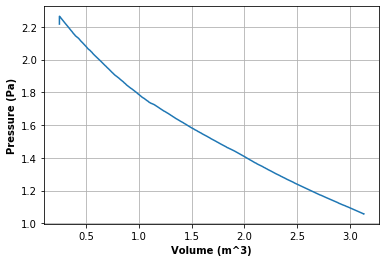

In [408]:
#Sample plot of calibrated data V vs. P
argon_isothermal_plot = plt.plot(argon_isothermal_volume_cal[1], argon_isothermal_pressure_cal[1])
plt.xlabel("Volume (m^3)", fontweight="bold")
plt.ylabel("Pressure (Pa)", fontweight="bold")
plt.grid()

In [409]:
#Transforming data to log-log format
def log_transform(data):
    for i in range(len(data)):
        data[i] = np.log(data[i])
    return data

log_argon_isothermal_volume_cal = log_transform(argon_isothermal_volume_cal)
log_nitrogen_isothermal_volume_cal = log_transform(nitrogen_isothermal_volume_cal)
log_CO2_isothermal_volume_cal = log_transform(CO2_isothermal_volume_cal)

log_argon_isothermal_pressure_cal = log_transform(argon_isothermal_pressure_cal)
log_nitrogen_isothermal_pressure_cal = log_transform(nitrogen_isothermal_pressure_cal)
log_CO2_isothermal_pressure_cal = log_transform(CO2_isothermal_pressure_cal)

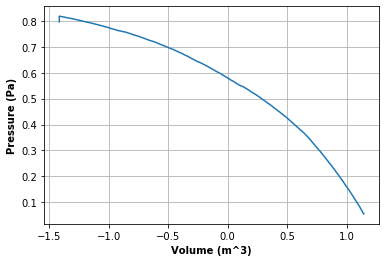

In [410]:
#Sample log-log plot
plt.plot(log_argon_isothermal_volume_cal[1], log_argon_isothermal_pressure_cal[1])
plt.xlabel("Volume (m^3)", fontweight="bold")
plt.ylabel("Pressure (Pa)", fontweight="bold")
plt.grid()

In [411]:
#Function to fit
def f(x,a,c):
    linear_model = a*x+c
    return linear_model

#Vectorizing fit function to allow lists as input
vectorized_f = np.vectorize(f)

#Function for fitting log-log curves given list of data sets
def fit(x_data, y_data, fit_params):
    if len(x_data) == len(y_data):
        p0 = (1,0)
        for i in range(len(x_data)):
            fit_params.append(optimize.curve_fit(vectorized_f, x_data[i], y_data[i], p0=p0))
        return fit_params
    else:
        print("Incompatible data sets: different lengths")

In [412]:
#Fitting a linear model log-log isothermal data
#Each fit returns a list of optimal parameters and covariance matrix for each of the three data sets
argon_isothermal_fit_params = []
argon_isothermal_fit = fit(log_argon_isothermal_volume_cal, 
                           log_argon_isothermal_pressure_cal, 
                           argon_isothermal_fit_params)
nitrogen_isothermal_fit_params = []
nitrogen_isothermal_fit = fit(log_nitrogen_isothermal_volume_cal, 
                           log_nitrogen_isothermal_pressure_cal, 
                           nitrogen_isothermal_fit_params)
CO2_isothermal_fit_params = []
CO2_isothermal_fit = fit(log_CO2_isothermal_volume_cal, 
                           log_CO2_isothermal_pressure_cal, 
                           CO2_isothermal_fit_params)

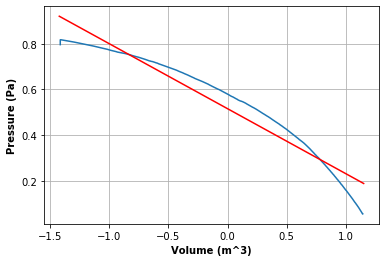

In [426]:
#Plotting a sample fit
plt.plot(log_argon_isothermal_volume_cal[1], log_argon_isothermal_pressure_cal[1])
plt.plot(log_argon_isothermal_volume_cal[0], 
         argon_isothermal_fit[1][0][0]*log_argon_isothermal_volume_cal[0]
         +argon_isothermal_fit[1][0][1], "-r")
plt.xlabel("Volume (m^3)", fontweight="bold")
plt.ylabel("Pressure (Pa)", fontweight="bold")
plt.grid()

In [414]:
#Average slopes of isothermal fits
def average_slope(data):
    slopes = []
    for i in range(len(data)):
        temp_list = data[i]
        slopes.append(temp_list[0][0])
    mean = np.mean(slopes)
    return mean

argon_isothermal_average_slope = average_slope(argon_isothermal_fit)
nitrogen_isothermal_average_slope = average_slope(nitrogen_isothermal_fit)
CO2_isothermal_average_slope = average_slope(CO2_isothermal_fit)

print("Argon isothermal fit average slope: ", argon_isothermal_average_slope)
print("Nitrogen isothermal fit average slope: ", nitrogen_isothermal_average_slope)
print("CO2 isothermal fit average slope: ", CO2_isothermal_average_slope)

Argon isothermal fit average slope:  -0.2804534232788523
Nitrogen isothermal fit average slope:  -0.26325615823700105
CO2 isothermal fit average slope:  -0.31755658666543246


In [415]:
#Getting average std. error of isothermal fits as returned from scipy.optimize.curve_fit
def error(data, sample):
    sample_size = len(sample[0])
    errors = []
    for i in range(len(data)):
        temp_list = data[i]
        covariance_array = temp_list[1]
        slope_error = np.sqrt(np.diag(covariance_array))
        errors.append(slope_error)
    average_error = np.mean(errors)
    return average_error

argon_isothermal_slope_error = error(argon_isothermal_fit, argon_isothermal_volume_cal)
nitrogen_isothermal_slope_error = error(nitrogen_isothermal_fit, argon_isothermal_volume_cal)
CO2_isothermal_slope_error = error(CO2_isothermal_fit, argon_isothermal_volume_cal)

print("Argon isothermal fit average slope error: ", argon_isothermal_slope_error)
print("Nitrogen isothermal fit average slope error: ", nitrogen_isothermal_slope_error)
print("CO2 isothermal fit average slope error: ", CO2_isothermal_slope_error)

Argon isothermal fit average slope error:  0.0033835389403235184
Nitrogen isothermal fit average slope error:  0.0036471187069968387
CO2 isothermal fit average slope error:  0.002878281512202041


In [416]:
#Loading adiabatic data
argon_adiabatic_data = []
argon_adiabatic_data = load_data("argon", argon_adiabatic_data, "adiabatic")

nitrogen_adiabatic_data = []
nitrogen_adiabatic_data = load_data("nitrogen", nitrogen_adiabatic_data, "adiabatic")

CO2_adiabatic_data = []
CO2_adiabatic_data = load_data("CO2", CO2_adiabatic_data, "adiabatic")

In [417]:
#Isolating Pressure and Volume for adiabatic process
argon_adiabatic_volume = get_feature(argon_adiabatic_data, volume)
argon_adiabatic_pressure = get_feature(argon_adiabatic_data, pressure)

nitrogen_adiabatic_volume = get_feature(nitrogen_adiabatic_data, volume)
nitrogen_adiabatic_pressure = get_feature(nitrogen_adiabatic_data, pressure)

CO2_adiabatic_volume = get_feature(CO2_adiabatic_data, volume)
CO2_adiabatic_pressure = get_feature(CO2_adiabatic_data, pressure)

In [418]:
#Calibrating adiabatic data
argon_adiabatic_volume_cal = calibrate_volume(argon_adiabatic_volume)
nitrogen_adiabatic_volume_cal = calibrate_volume(nitrogen_adiabatic_volume)
CO2_adiabatic_volume_cal = calibrate_volume(CO2_adiabatic_volume)

argon_adiabatic_pressure_cal = calibrate_pressure(argon_adiabatic_pressure)
nitrogen_adiabatic_pressure_cal = calibrate_pressure(nitrogen_adiabatic_pressure)
CO2_adiabatic_pressure_cal = calibrate_pressure(CO2_adiabatic_pressure)

In [419]:
#Getting rid of anomalous infinities from calibration
replace_diagonals(argon_adiabatic_volume_cal)
replace_diagonals(nitrogen_adiabatic_volume_cal)
replace_diagonals(CO2_adiabatic_volume_cal)

replace_diagonals(argon_adiabatic_pressure_cal)
replace_diagonals(nitrogen_adiabatic_pressure_cal)
replace_diagonals(CO2_adiabatic_pressure_cal)

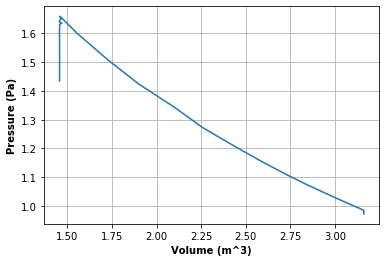

In [420]:
#Sample plot of raw data
plt.plot(argon_adiabatic_volume_cal[1], argon_adiabatic_pressure_cal[1])
plt.xlabel("Volume (m^3)", fontweight="bold")
plt.ylabel("Pressure (Pa)", fontweight="bold")
plt.grid()

In [421]:
#Transforming adiabatic data to log-log format
log_argon_adiabatic_volume_cal = log_transform(argon_adiabatic_volume_cal)
log_nitrogen_adiabatic_volume_cal = log_transform(nitrogen_adiabatic_volume_cal)
log_CO2_adiabatic_volume_cal = log_transform(CO2_adiabatic_volume_cal)

log_argon_adiabatic_pressure_cal = log_transform(argon_adiabatic_pressure_cal)
log_nitrogen_adiabatic_pressure_cal = log_transform(nitrogen_adiabatic_pressure_cal)
log_CO2_adiabatic_pressure_cal = log_transform(CO2_adiabatic_pressure_cal)

In [422]:
#Fitting linear model to log-log adiabatic data
argon_adiabatic_fit_params = []
argon_adiabatic_fit = fit(log_argon_adiabatic_volume_cal, 
                           log_argon_adiabatic_pressure_cal, 
                           argon_adiabatic_fit_params)
nitrogen_adiabatic_fit_params = []
nitrogen_adiabatic_fit = fit(log_nitrogen_adiabatic_volume_cal, 
                           log_nitrogen_adiabatic_pressure_cal, 
                           nitrogen_adiabatic_fit_params)
CO2_adiabatic_fit_params = []
CO2_adiabatic_fit = fit(log_CO2_adiabatic_volume_cal, 
                           log_CO2_adiabatic_pressure_cal, 
                           CO2_adiabatic_fit_params)

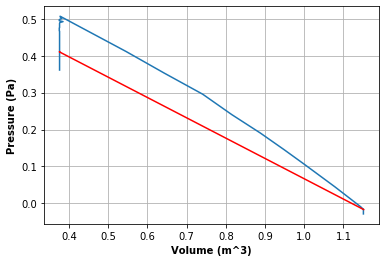

In [427]:
#Plotting a sample fit
plt.plot(log_argon_adiabatic_volume_cal[1], log_argon_adiabatic_pressure_cal[1])
plt.plot(log_argon_adiabatic_volume_cal[0], 
         argon_adiabatic_fit[1][0][0]*log_argon_adiabatic_volume_cal[0]
         +argon_adiabatic_fit[1][0][1], "-r")
plt.xlabel("Volume (m^3)", fontweight="bold")
plt.ylabel("Pressure (Pa)", fontweight="bold")
plt.grid()

In [424]:
#Average slopes of adiabatic fits
argon_adiabatic_average_slope = average_slope(argon_adiabatic_fit)
nitrogen_adiabatic_average_slope = average_slope(nitrogen_adiabatic_fit)
CO2_adiabatic_average_slope = average_slope(CO2_adiabatic_fit)

print("Argon adiabatic fit average slope: ", argon_adiabatic_average_slope)
print("Nitrogen adiabatic fit average slope: ", nitrogen_adiabatic_average_slope)
print("CO2 adiabatic fit average slope: ", CO2_adiabatic_average_slope)

Argon adiabatic fit average slope:  -0.5242875411433704
Nitrogen adiabatic fit average slope:  -0.5205805601250592
CO2 adiabatic fit average slope:  -0.5155641403941239


In [425]:
#Getting average std. error of adiabatic fits as returned from scipy.optimize.curve_fit
argon_adiabatic_slope_error = error(argon_adiabatic_fit, argon_adiabatic_volume_cal)
nitrogen_adiabatic_slope_error = error(nitrogen_adiabatic_fit, nitrogen_adiabatic_volume_cal)
CO2_adiabatic_slope_error = error(CO2_adiabatic_fit, CO2_adiabatic_volume_cal)

print("Argon adiabatic fit average slope error: ", argon_adiabatic_slope_error)
print("Nitrogen adiabatic fit average slope error: ", nitrogen_adiabatic_slope_error)
print("CO2 adiabatic fit average slope error: ", CO2_adiabatic_slope_error)

Argon adiabatic fit average slope error:  0.00661185787160315
Nitrogen adiabatic fit average slope error:  0.004361212927458786
CO2 adiabatic fit average slope error:  0.0033134710779764037
